In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 

plt.rc('font', family = "serif", size=12)

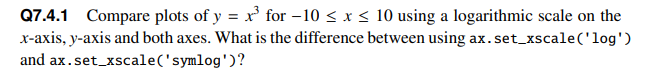

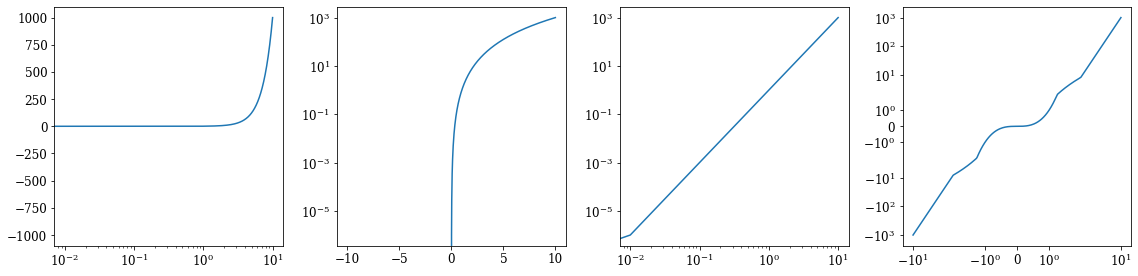

In [32]:
x = np.linspace(-10,10,1000)

fig, ax = plt.subplots(nrows=1, ncols=4, tight_layout=True, figsize=(16,4))
for i in range(4):
    ax[i].plot(x,x**3)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    
ax[0].set_yscale('linear')
ax[1].set_xscale('linear')
ax[3].set_xscale('symlog')
ax[3].set_yscale('symlog')
plt.show()

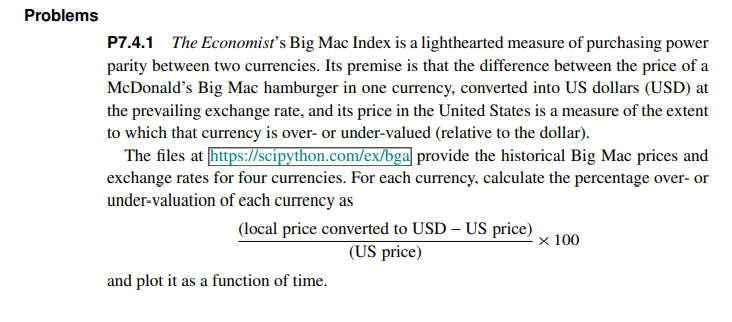

file source  https://scipython.com/ex/bga 

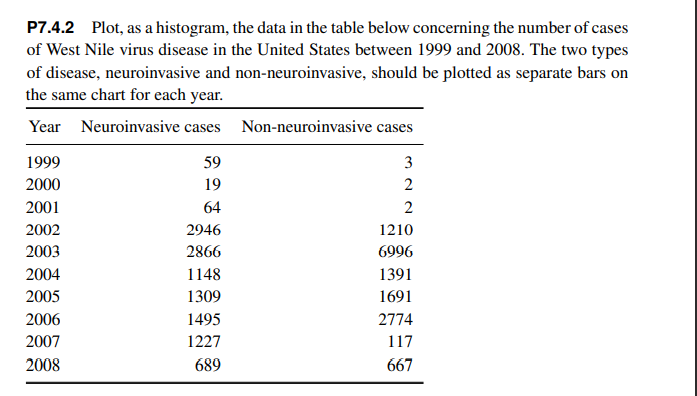

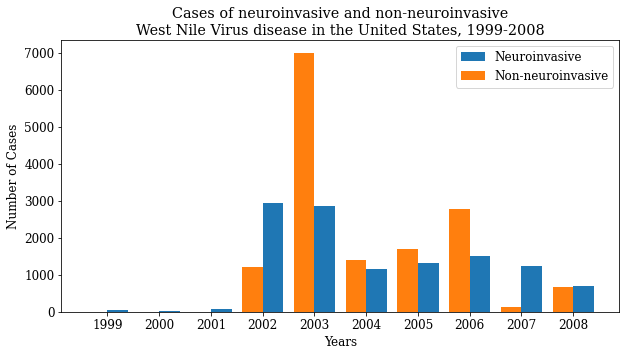

In [76]:
#soln to 7.4.2
year = np.array(range(1999,2009))
neuro = np.array([59,19,64,2946,2866,1148,1309,1495,1227,689])
non_neuro = np.array([3,2,2,1210,6996,1391,1691,2774,117,667])

fig,ax = plt.subplots(figsize=(10,5), facecolor='w', edgecolor='w')
ax.bar(year,neuro, align='edge', width=0.4, label='Neuroinvasive') #aligns to right
ax.bar(year, non_neuro, align='edge', width=-0.4, label='Non-neuroinvasive') #aligns to left
ax.legend()
ax.set_xticks(year)
ax.set_xlabel('Years')
ax.set_ylabel('Number of Cases')
ax.set_title('Cases of neuroinvasive and non-neuroinvasive\n'
             'West Nile Virus disease in the United States, 1999-2008')
plt.savefig("images/West_Nile_Virus.png")
plt.show()

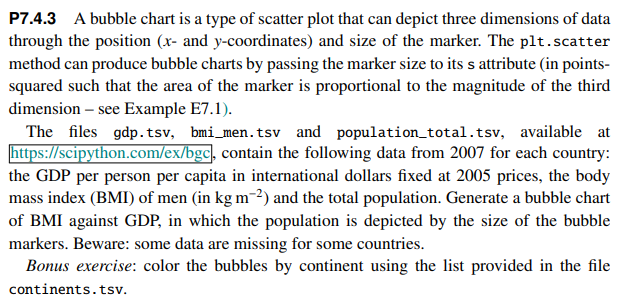

source file: [Link to data files](https://scipython.com/book2/chapter-7-matplotlib/problems/p71/bmi-variation-with-of-gdp/)

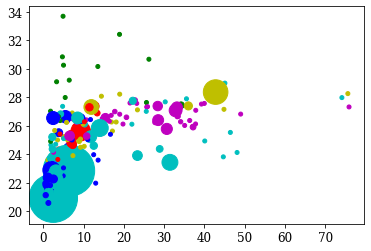

In [399]:
#solution to problem 7.4.3
#reading and storing data in list of dictionaries
data_sources = ('gdp', 'bmi_men', 'population_total', 'continents')
data = list(range(len(data_sources)))

for i,source in enumerate(data_sources):
    file_data = pd.read_table(f"datas/{source}.tsv", header=None)
    country = file_data[0].to_list()
    value = file_data[1].to_list()
    data[i] = {a:b for (a,b) in zip(country,value) if pd.notnull(b)}
    
# data is a list containg 4 dictionaries of each files 
bmi = [v for (k,v) in data[1].items() if k in data[0].keys()]  #extracting bmi value from data[1] that is in other file too
gdp = [v for (k,v) in data[0].items() if k in data[1].keys()]  #extracting gdp value from data[0]
population = [v for (k,v) in data[2].items() if k in data[1].keys()] #extracting population of respective country from data[2]

continents_name = set(data[3].values()) #set containing name of continents only
color_dict = {continent:'rgcybm'[i] for i,continent in enumerate(continents)}#dictionary with bmi color code to each continents
country_list = [k for (k,v) in data[1].items() if k in data[0].keys()] #fetching country list

color_list = [] #for color code of same length
for country in country_list:
    mahadesh = data[3][country]
    color_list.append(color_dict[mahadesh])
sizes = np.clip(np.array(population)/1e9 * 2000, 16, None)   
fig, ax = plt.subplots()
ax.scatter(np.array(gdp)/1e3,bmi, c=color_list,s=sizes, label=country)
plt.show()